In [1]:
import matplotlib.pyplot as plt
import numpy as np


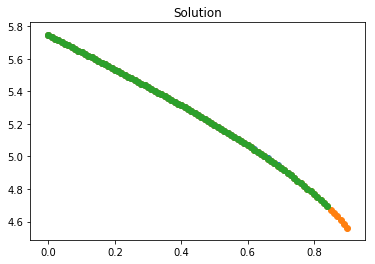

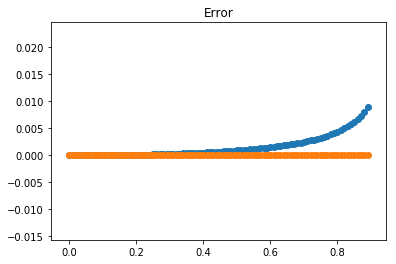

In [333]:
def f(x,y):
    return -np.sqrt(3 + y ** 2) / (np.sqrt(1 - x ** 2) * y) 

def real_f(x):
    return np.sqrt((6 - np.arcsin(x)) ** 2 - 3)

def MRK4(xold, yold, h):
    k1 = f(xold,yold)
    k2 = f(xold + h / 2, yold + k1 * h / 2)
    k3 = f(xold + h / 2, yold + k2 * h / 2)
    k4 = f(xold + h, yold + h * k3)
    return yold + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    
x = 0
y = 5.7445
h = 0.01
stop = x + 0.9
x_mass = [0]
y_MRK4 = [5.7445]
y_real = [5.7445]
error_mrk = []
error_adm = []
while x < stop:
    y = MRK4(x, y, h)
    x = x + h
    y_real.append(real_f(x))
    y_MRK4.append(y)
    x_mass.append(x)
    error_mrk.append(abs(y - real_f(x)))

x = x_mass[3]
y = 5.7445
h = 0.01
stop = x + 0.9
y_Adam = [0,0,0,0]

for i in range(0,4): y_Adam[i] = y_MRK4[i]


iteration = 4


while x < stop:
    y = (y_Adam[iteration-1] 
         + (h/24)*(55*f(x,y_Adam[iteration-1])
            - 59*f(x,y_Adam[iteration-2])
            + 37*f(x,y_Adam[iteration-3])
            - 9 *f(x,y_Adam[iteration-4])))

    x = x + h
    y_Adam.append(y)
    iteration += 1
    error_adm.append(abs(y - real_f(x)))

plt.title("Solution")
plt.scatter(x_mass[:75],y_Adam[:75])
plt.scatter(x_mass,y_real)
plt.scatter(x_mass[:85],y_MRK4[:85])
plt.show()
plt.title("Error")
plt.scatter(x_mass[:90],error_adm)
plt.scatter(x_mass[:90],error_mrk)

In [334]:
#     y = y_Adam[iteration - 1] +    3/2 * h * f(x_mass[iteration - 1],y_Adam[iteration - 1])
#                                  - 0.5 * h * f(x_mass[iteration - 2],y_Adam[iteration - 2])

In [335]:
h = 0.01
k = []
l = []
x_mass = [0]
for i in range(20):
    x = 0
    y = 5.7445
#     h = 0.01
    stop = 0.9
    
    y_MRK4 = [5.7445]
    y_real = [5.7445]
    error_mrk = []
    error_adm = []
    while x < stop :
        y = MRK4(x, y, h)
        x = x + h
        y_real.append(real_f(x))
        y_MRK4.append(y)
        x_mass.append(x)
        error_mrk.append(abs(y - real_f(x)))

    z = x_mass[3]
    y = 5.7445
#     h = 0.01
    stop = 0.9
    y_Adam = [0,0,0,0]

    for i in range(0,4): y_Adam[i] = y_MRK4[i]


    iteration = 4

    
    while z < stop:
        y = (y_Adam[iteration-1] 
             + (h/24)*(55*f(x,y_Adam[iteration-1])
                - 59*f(z,y_Adam[iteration-2])
                + 37*f(z,y_Adam[iteration-3])
                - 9 *f(z,y_Adam[iteration-4])))

        z = z + h
        y_Adam.append(y)
        iteration += 1
        error_adm.append(abs(y - real_f(x)))
    h+=0.005
    
    k.append(max(error_mrk))
    l.append(np.sqrt(sum(error_adm)**2*h))
    


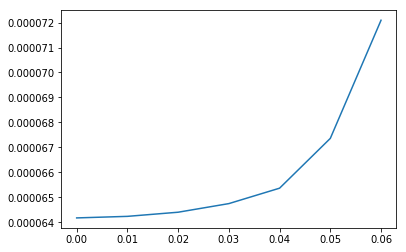

In [336]:
plt.plot(x_mass[:7],k[:7])
plt.show()


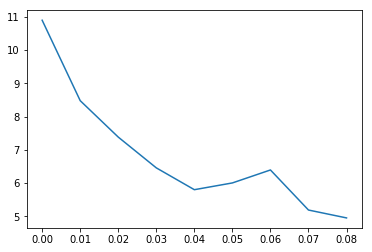

In [337]:
plt.plot(x_mass[:9],l[:9])